#  EDA

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df=pd.read_csv('C:/Users/HMC/Documents/UM/coffee sales/index.csv')
print(df.head(5))
df.info()
des=df.describe(include='all')
des.to_csv('C:/Users/HMC/Documents/UM/coffee sales/des.csv')
print(des)

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   

# Missing Value

In [71]:
m=df.isna().sum()
print(m)

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


# Numerical Feature Analysis

['money']


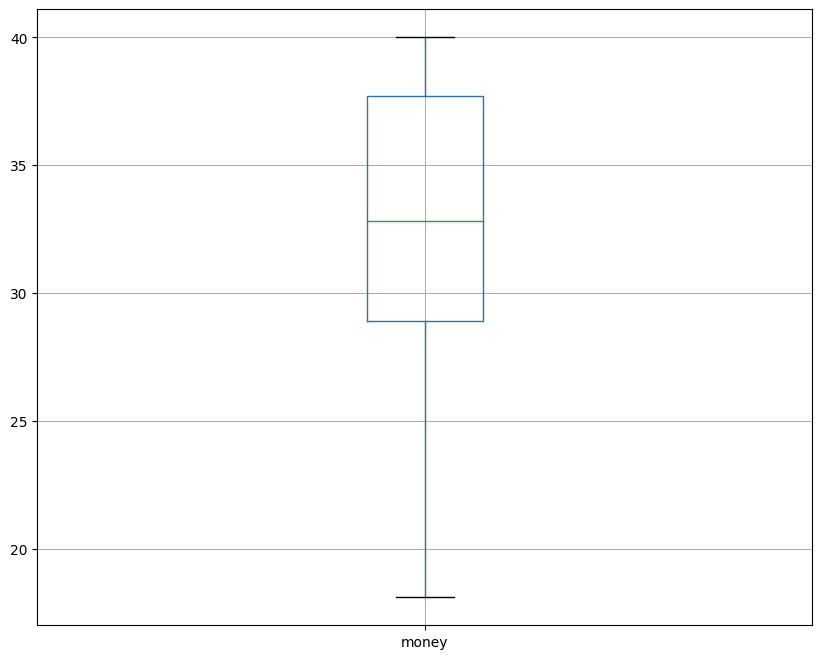

In [72]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
print(numerical_features)
df.boxplot(numerical_features,figsize=(10,8))
plt.xticks(rotation=0)
plt.show()

# Cash Type Plot

  cash_type  coffee_name
0      card         1044
1      cash           89


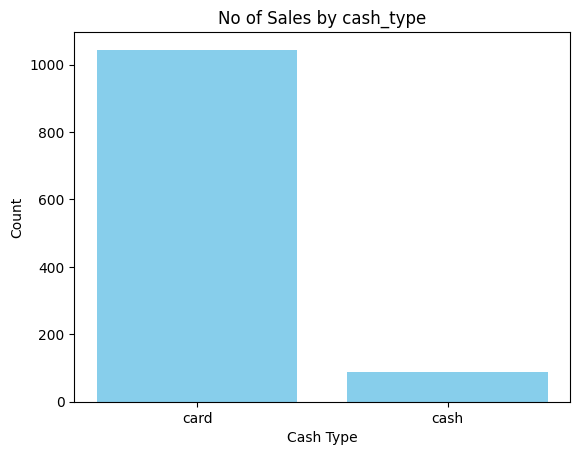

In [73]:
data=df.copy()
data=data.groupby('cash_type')['coffee_name'].count().reset_index()
print(data)

plt.bar(data['cash_type'],data['coffee_name'],color='skyblue')
plt.title('No of Sales by cash_type')
plt.xlabel('Cash Type')
plt.ylabel('Count')
plt.show()

  cash_type      money
0      card  32.876322
1      cash  35.797753


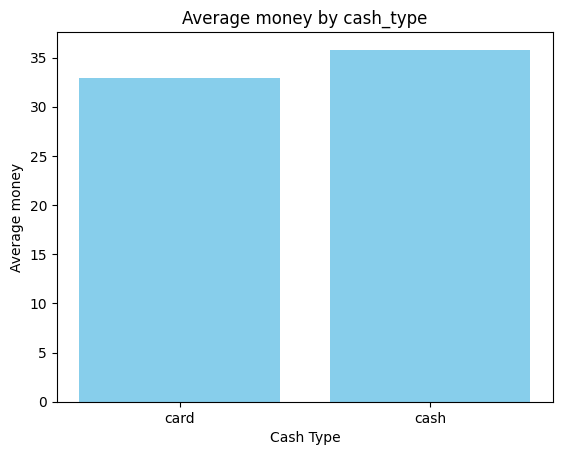

In [74]:
data=df.copy()
data=data.groupby('cash_type')['money'].mean().reset_index()
print(data)

plt.bar(data['cash_type'],data['money'],color='skyblue')
plt.title('Average money by cash_type')
plt.xlabel('Cash Type')
plt.ylabel('Average money')
plt.show()

# Total no of sales of Each coffee

           coffee_name  money
0            Americano    169
1  Americano with Milk    268
2           Cappuccino    196
3                Cocoa     35
4              Cortado     99
5             Espresso     49
6        Hot Chocolate     74
7                Latte    243


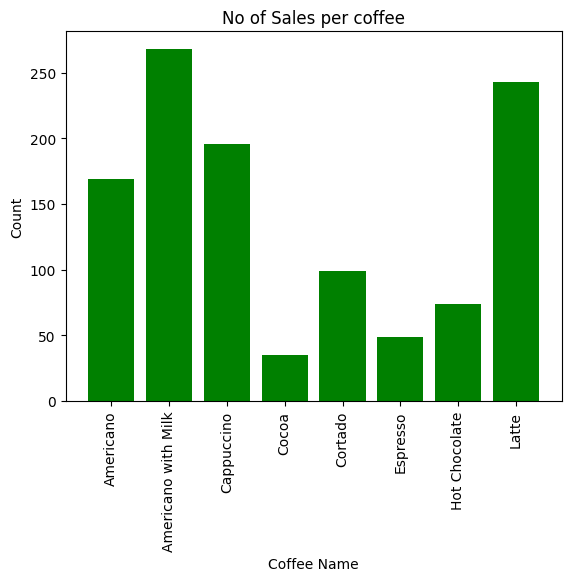

In [75]:
data=df.copy()
data=data.groupby('coffee_name')['money'].count().reset_index()
print(data)

plt.bar(data['coffee_name'],data['money'],color='green')
plt.title('No of Sales per coffee')
plt.xlabel('Coffee Name')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

# Total Average money of each coffee

           coffee_name      money
0            Americano  27.482485
1  Americano with Milk  32.096791
2           Cappuccino  37.413980
3                Cocoa  37.026857
4              Cortado  27.728081
5             Espresso  22.461633
6        Hot Chocolate  37.547027
7                Latte  37.074650


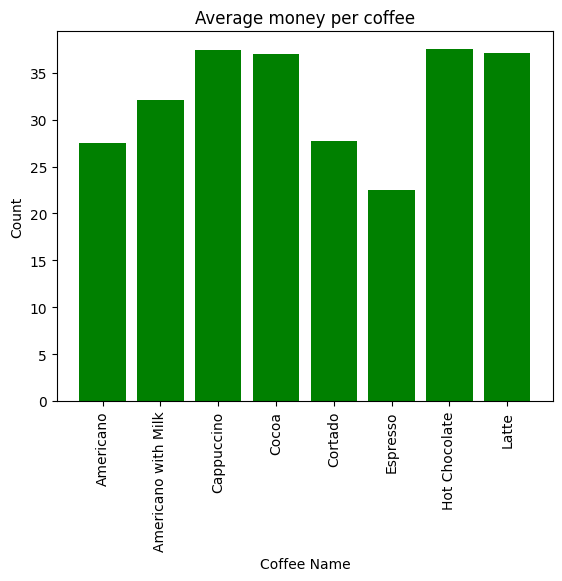

In [76]:
data=df.copy()
data=data.groupby('coffee_name')['money'].mean().reset_index()
print(data)

plt.bar(data['coffee_name'],data['money'],color='green')
plt.title('Average money per coffee')
plt.xlabel('Coffee Name')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

# Daily Sales Analysis

         date      money
0  2024-03-01  36.027273
1  2024-03-02  32.585714
2  2024-03-03  34.910000
3  2024-03-04  33.800000
4  2024-03-05  37.611111


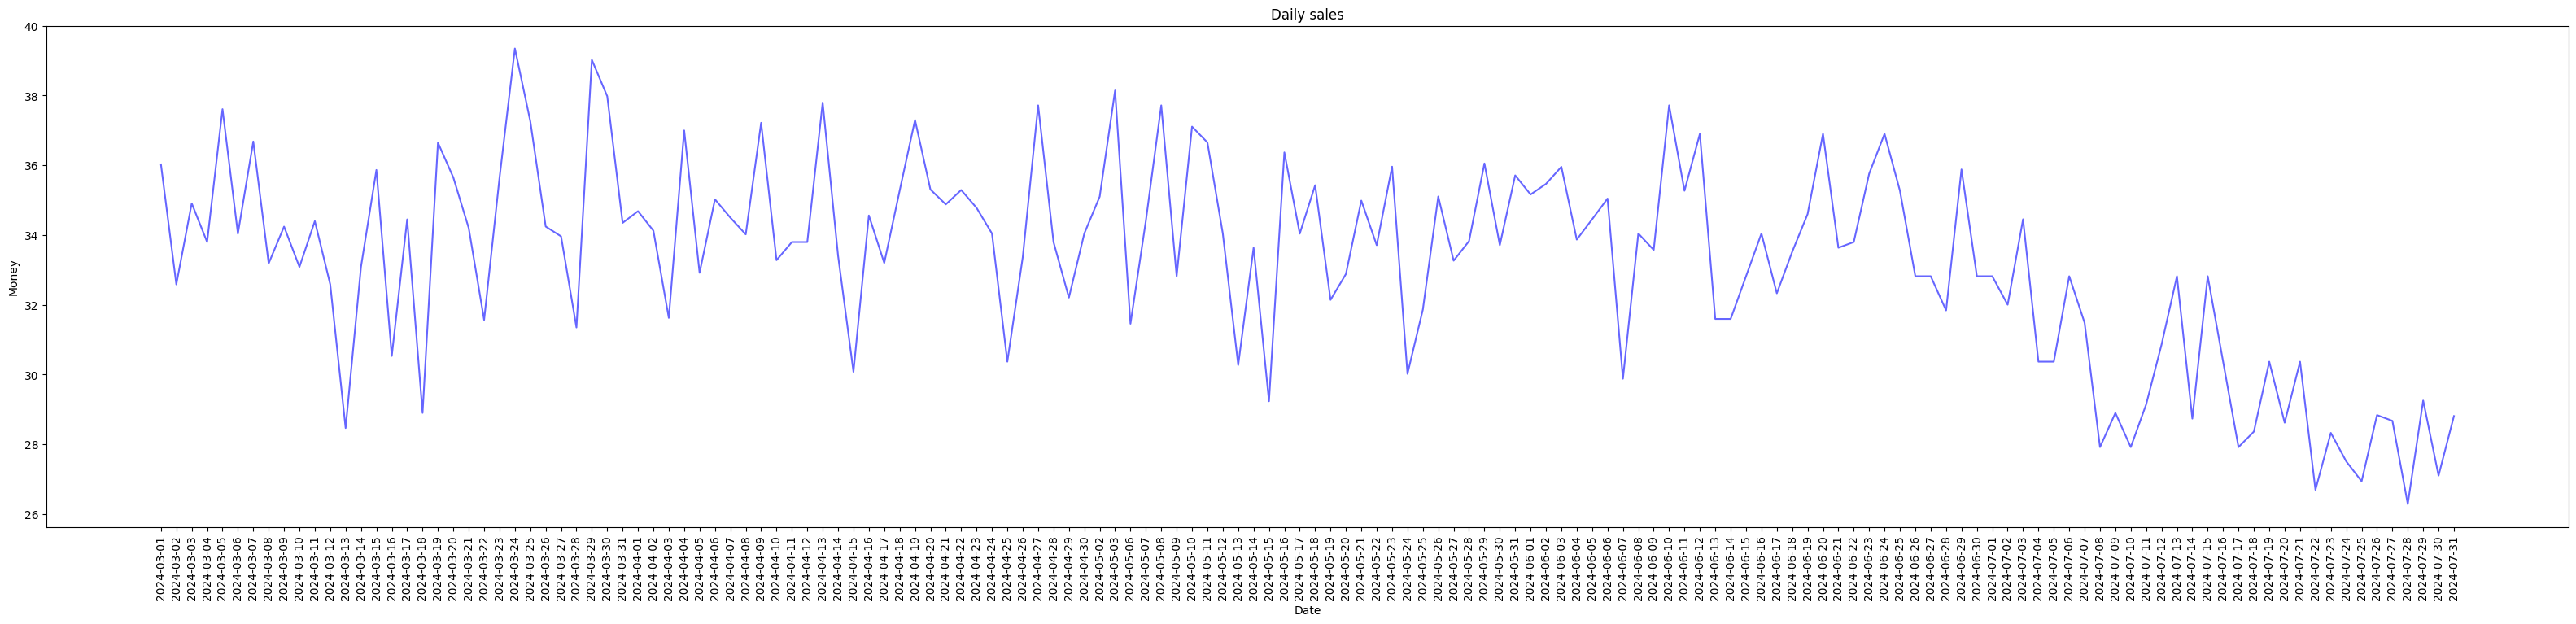

In [77]:
df=df.sort_values('date')
data=df.copy()
data=data.groupby('date')['money'].mean().reset_index()
print(data.head(5))

plt.figure(figsize=(40,8))
plt.plot(data['date'],data['money'],color='blue',alpha=0.6)
plt.title('Daily sales')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Money')
plt.show()

In [78]:
plt.scatter(data['date'],data['money'])


# Seasonal Decomposition

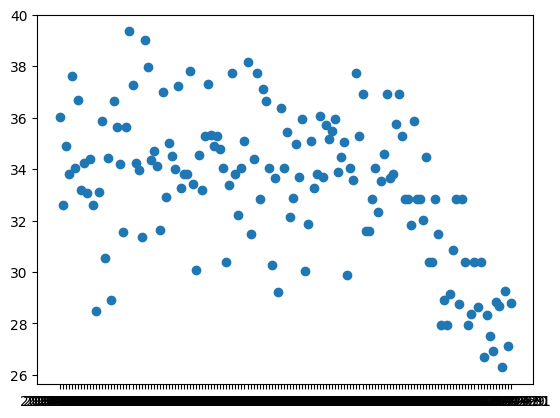

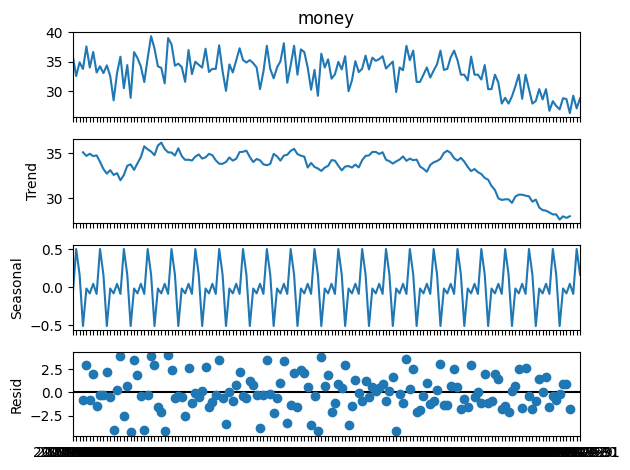

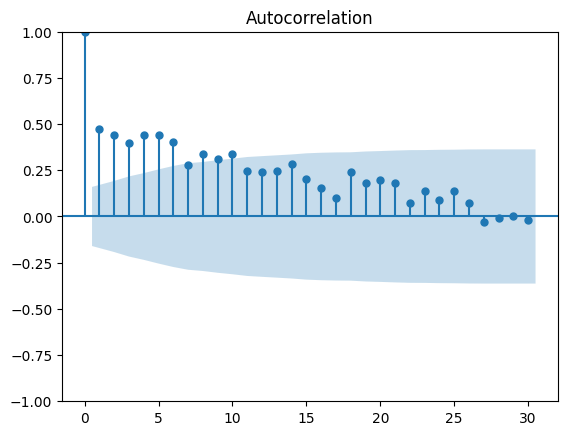

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data.set_index('date')['money'], model='additive', period=7)  # period=7 for weekly
result.plot()
plt.show()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['money'],lags=30)

# SVR

In [80]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

d=data.copy()
d['date']=pd.to_datetime(d['date'])
d=d.sort_values('date')

d['lag1']=d['money'].shift(1)
d['lag2']=d['money'].shift(2)
d['lag7']=d['money'].shift(7)
d['dayofweek']=d['date'].dt.dayofweek

d=d.dropna()

X=d[['lag1','lag2','lag7','dayofweek']]
y=d['money']

scaler_X=StandardScaler()
scaler_y=StandardScaler()
X_scaled=scaler_X.fit_transform(X)
y_scaled=scaler_y.fit_transform(y.values.reshape(-1,1)).ravel()

train_size = -14
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

svr=SVR(kernel='rbf',C=10,gamma=.1,epsilon=.001)
svr.fit(X_train,y_train)

y_pred=svr.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('SVR RMSE: ',rmse)



SVR RMSE:  0.7494512810965042


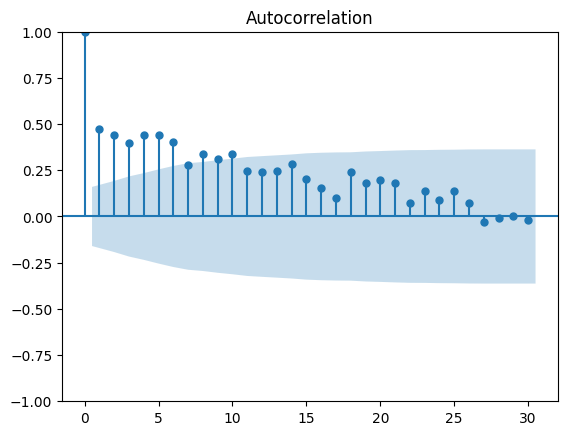

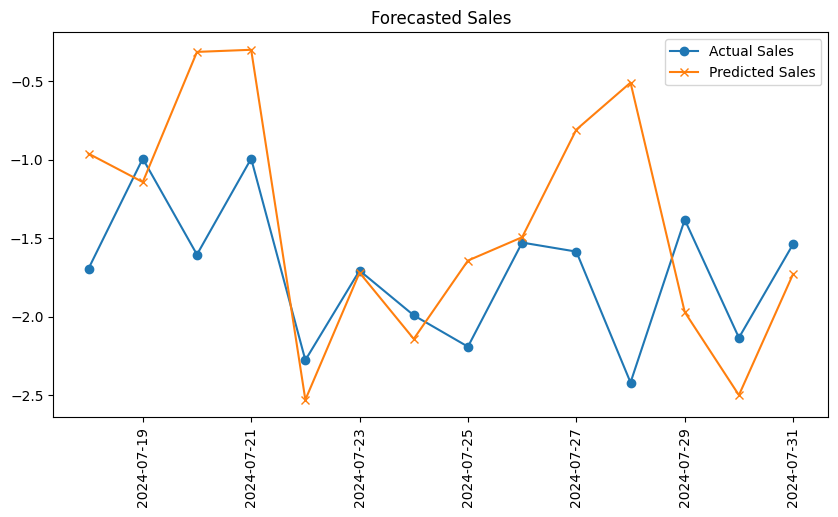

In [81]:
plt.figure(figsize=(10,5))
plt.plot(d['date'].iloc[train_size:],y_test,label='Actual Sales',marker='o')
plt.plot(d['date'].iloc[train_size:],y_pred,label='Predicted Sales',marker='x')
plt.xticks(rotation=90)
plt.title('Forecasted Sales')
plt.legend()
plt.show()

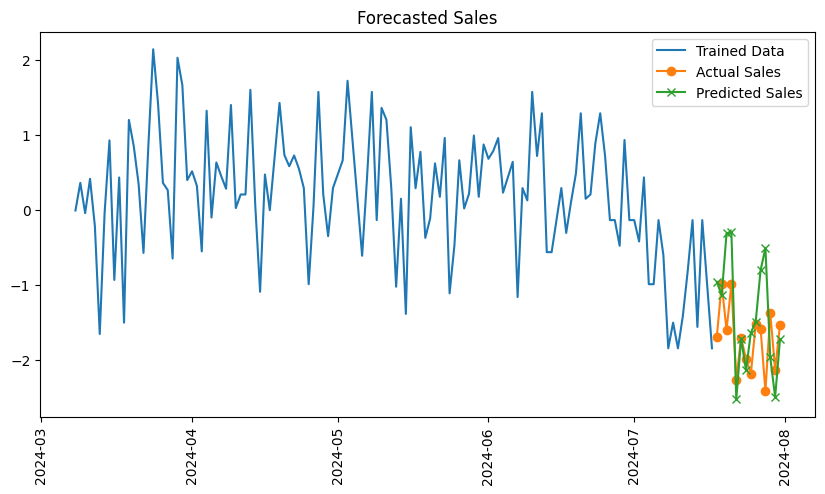

In [82]:
plt.figure(figsize=(10,5))
plt.plot(d['date'].iloc[:len(y_train)],y_train,label='Trained Data')
plt.plot(d['date'].iloc[train_size:],y_test,label='Actual Sales',marker='o')
plt.plot(d['date'].iloc[train_size:],y_pred,label='Predicted Sales',marker='x')
plt.xticks(rotation=90)
plt.title('Forecasted Sales')
plt.legend()
plt.show()


In [83]:
last_date=d['date'].iloc[-1]
n_days=7
future_dates=pd.date_range(start=last_date+pd.Timedelta(days=1),periods=n_days)
forecast=[]
forecast_results=[]

for i,future_date in enumerate(future_dates):
    lag1=d['money'].iloc[-1]
    lag2=d['money'].iloc[-2]
    lag7=d['money'].iloc[-7]
    dayofweek=future_date.dayofweek
    x=[[lag1,lag2,lag7,dayofweek]]
    x_scaled=scaler_X.transform(x)
    f=svr.predict(x_scaled)[0]
    f=scaler_y.inverse_transform(f.reshape(1,-1))[0][0]
    forecast_results.append({
        'date': future_date,
        'forecasted_sales': f
    })
    
    new_row={'money':f,'lag1':lag1,'lag2':lag2,'lag7':lag7,'dayofweek':dayofweek}
    new_df=pd.DataFrame([new_row],index=[future_date])
    new=pd.concat([d,new_df])

forecast_df=pd.DataFrame(forecast_results)
print(forecast_df)
print(new.head(5))

        date  forecasted_sales
0 2024-08-01         29.012475
1 2024-08-02         30.126280
2 2024-08-03         31.056794
3 2024-08-04         31.691520
4 2024-08-05         26.478305
5 2024-08-06         26.997811
6 2024-08-07         27.900183
         date      money       lag1       lag2       lag7  dayofweek
7  2024-03-08  33.187500  36.683333  34.040000  36.027273          4
8  2024-03-09  34.242857  33.187500  36.683333  32.585714          5
9  2024-03-10  33.085714  34.242857  33.187500  34.910000          6
10 2024-03-11  34.400000  33.085714  34.242857  33.800000          0
11 2024-03-12  32.585714  34.400000  33.085714  37.611111          1


c:\Users\HMC\Desktop\github\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\HMC\Desktop\github\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\HMC\Desktop\github\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\HMC\Desktop\github\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\HMC\Desktop\github\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\HMC\Desktop\github\venv\lib\site-packages\sklearn\b

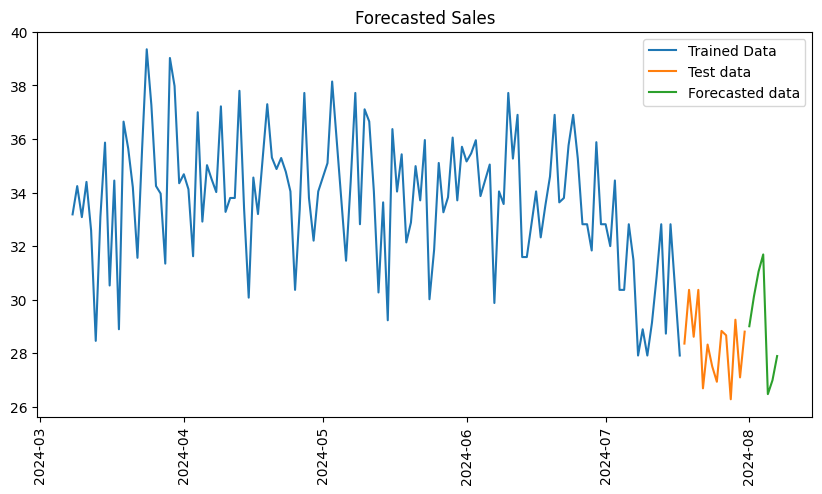

In [84]:

y_train_o=scaler_y.inverse_transform(y_train.reshape(-1,1)).flatten()
y_test_o=scaler_y.inverse_transform(y_test.reshape(-1,1)).flatten()

plt.figure(figsize=(10,5))
plt.plot(new['date'].iloc[:len(y_train)],y_train_o,label='Trained Data')
l=len(y_train_o)+len(y_test_o)
plt.plot(new['date'].iloc[len(y_train):l],y_test_o,label='Test data')
plt.plot(forecast_df['date'],forecast_df['forecasted_sales'],label='Forecasted data')
plt.xticks(rotation=90)
plt.title('Forecasted Sales')
plt.legend()
plt.show()

# SARIMA

In [85]:
from pmdarima import auto_arima
d=data.copy()
d['date']=pd.to_datetime(d['date'])
d.sort_values('date')

train_size=-7
train,test=d.iloc[:train_size],d.iloc[train_size:]

y=train['money']
arm=auto_arima(y,seasonal=True,m=14,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
print(arm.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[14] intercept   : AIC=648.250, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[14] intercept   : AIC=713.230, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[14] intercept   : AIC=678.304, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[14] intercept   : AIC=640.510, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[14]             : AIC=711.289, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[14] intercept   : AIC=640.315, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[14] intercept   : AIC=640.692, Time=0.26 sec
 ARIMA(0,1,1)(1,0,1)[14] intercept   : AIC=642.365, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[14] intercept   : AIC=642.303, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[14] intercept   : AIC=642.302, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[14] intercept   : AIC=678.703, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[14] intercept   : AIC=644.300, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[14]             : AIC=640.057, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[14]             : AIC=640.213, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[14]         

1.3488221656521193


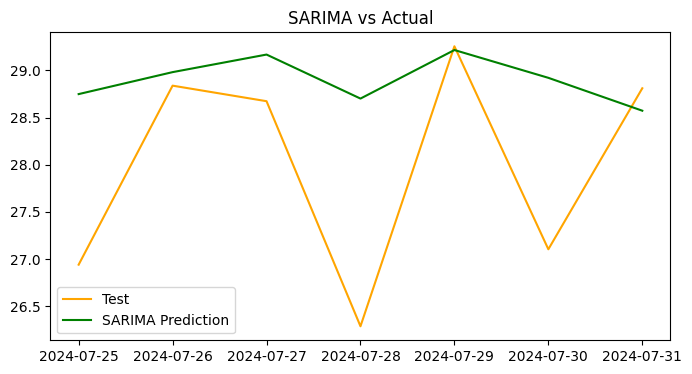

In [86]:
pre=arm.predict(len(test))
rmse=np.sqrt(mean_squared_error(test['money'],pre))
print(rmse)

plt.figure(figsize=(8,4))
plt.plot(test['date'], test['money'], label='Test', color='orange')
plt.plot(test['date'], pre, label='SARIMA Prediction', color='green')
plt.legend()
plt.title("SARIMA vs Actual")
plt.show()

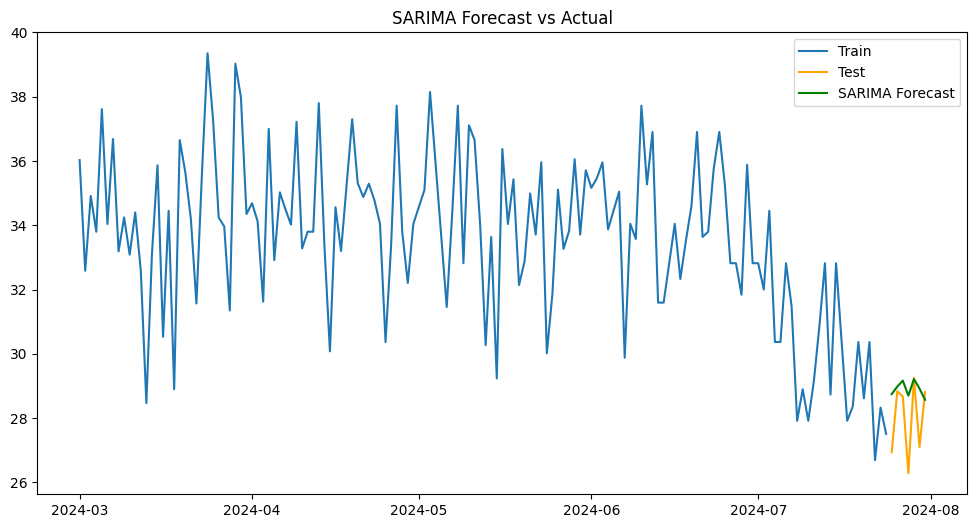

In [87]:
plt.figure(figsize=(12,6))
plt.plot(train['date'], train['money'], label='Train')
plt.plot(test['date'], test['money'], label='Test', color='orange')
plt.plot(test['date'], pre, label='SARIMA Forecast', color='green')
plt.legend()
plt.title("SARIMA Forecast vs Actual")
plt.show()

# Holt-Winter

In [88]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

d=data.copy()
d=d.sort_values('date')
d.set_index('date',inplace=True)

train_size=-7
train,test=d.iloc[:train_size],d.iloc[train_size:]

best_rmse = float('inf')
sp=[]
forecasted=[]

for i in range(2,31):
    hw_model=ExponentialSmoothing(train['money'],trend='add',seasonal='add',seasonal_periods=i)
    model_fit=hw_model.fit(optimized=True)
    y_pred=model_fit.forecast(len(test))
    rmse=np.sqrt(mean_squared_error(test['money'],y_pred))
    if rmse<best_rmse:
        best_rmse=rmse
        sp=i
        forecasted=y_pred
print('RMSE: ',best_rmse,'/nBest seasonal period: ',sp)


c:\Users\HMC\Desktop\github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HMC\Desktop\github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HMC\Desktop\github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\HMC\Desktop\github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. fo

RMSE:  0.9721049208021431 /nBest seasonal period:  18


c:\Users\HMC\Desktop\github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HMC\Desktop\github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


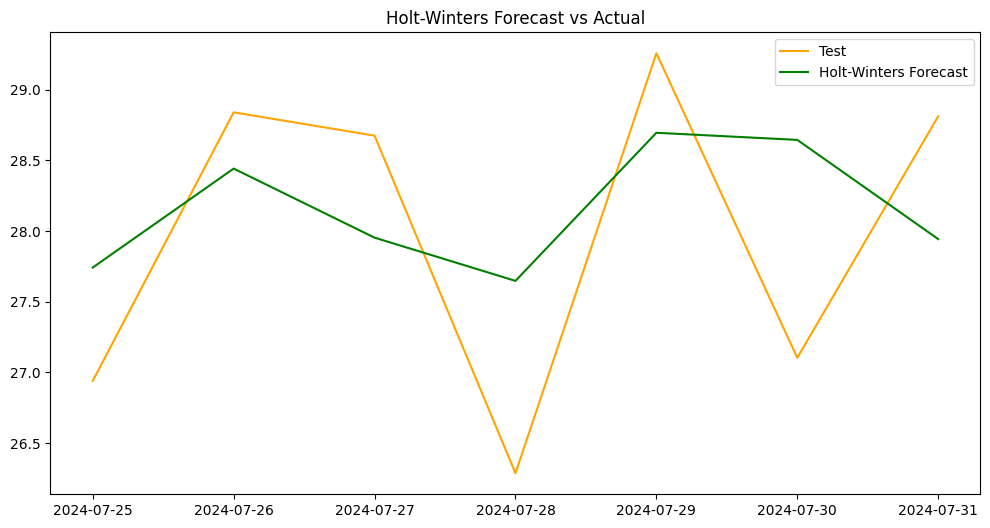

In [89]:
plt.figure(figsize=(12,6))
plt.plot(test.index, test['money'], label='Test', color='orange')
plt.plot(test.index, forecasted, label='Holt-Winters Forecast', color='green')
plt.legend()
plt.title("Holt-Winters Forecast vs Actual")
plt.show()

# Daily Sales of Each Coffee

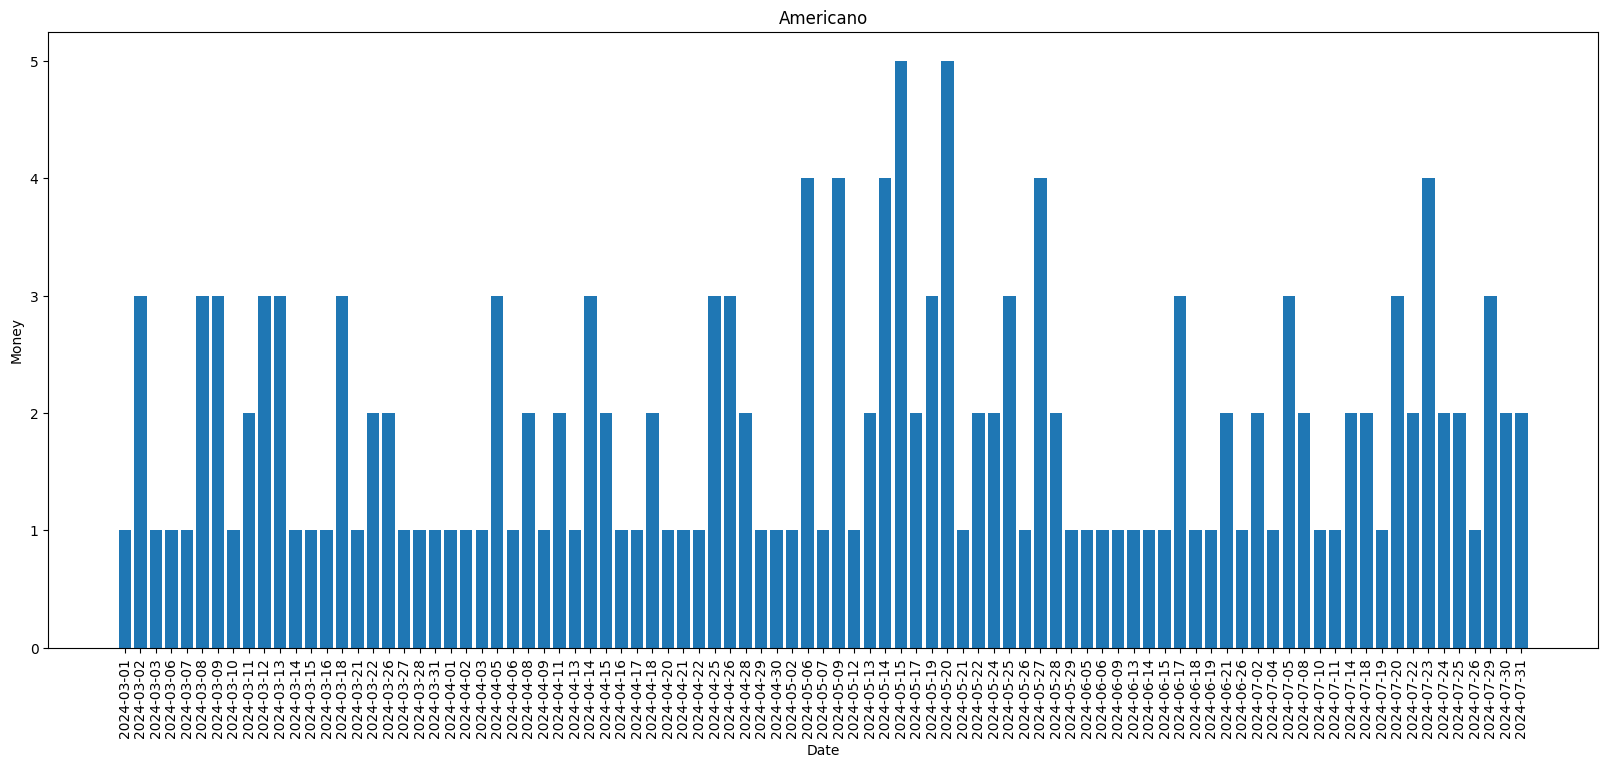

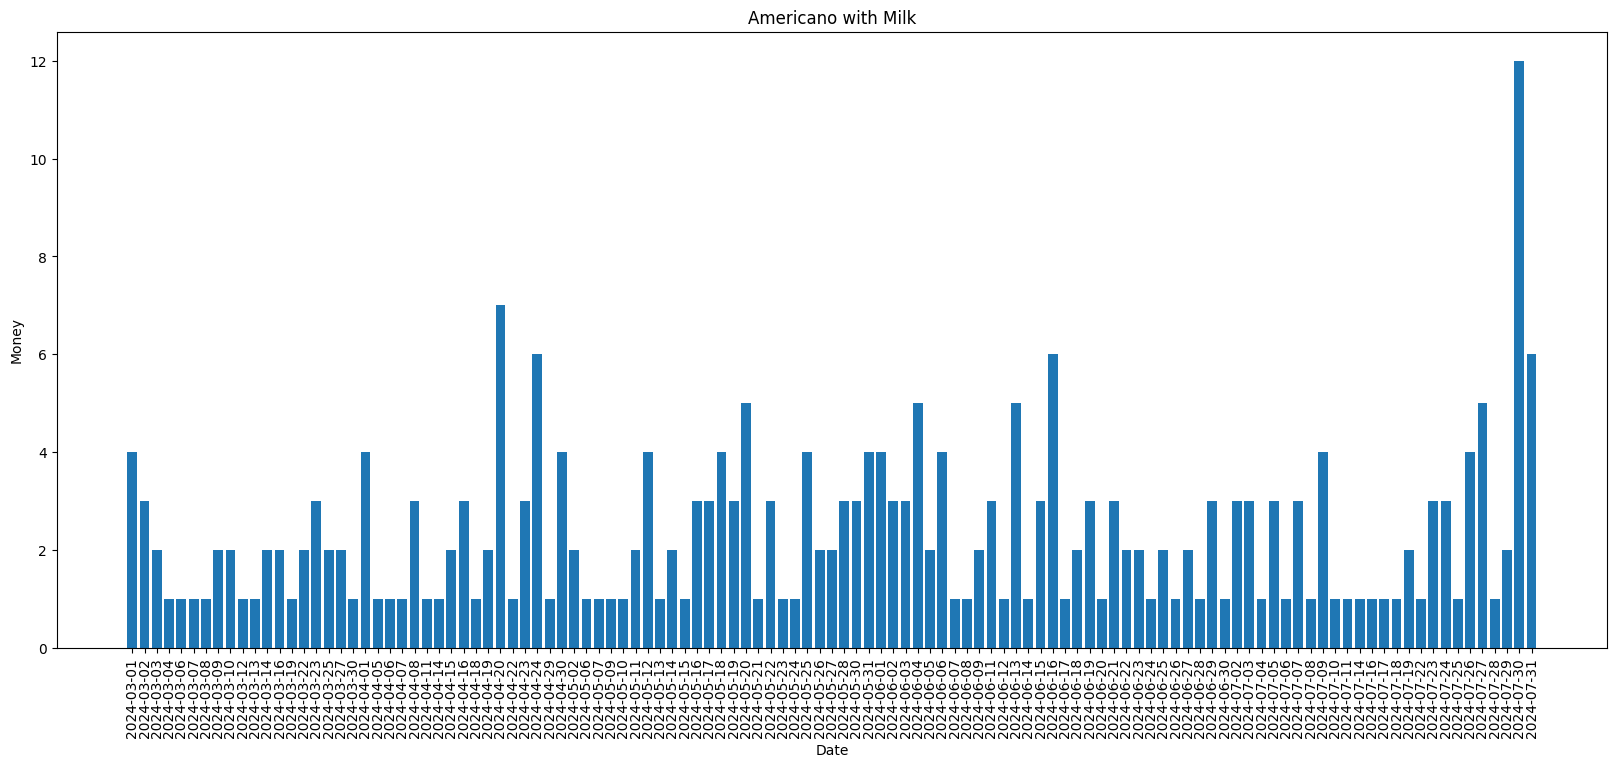

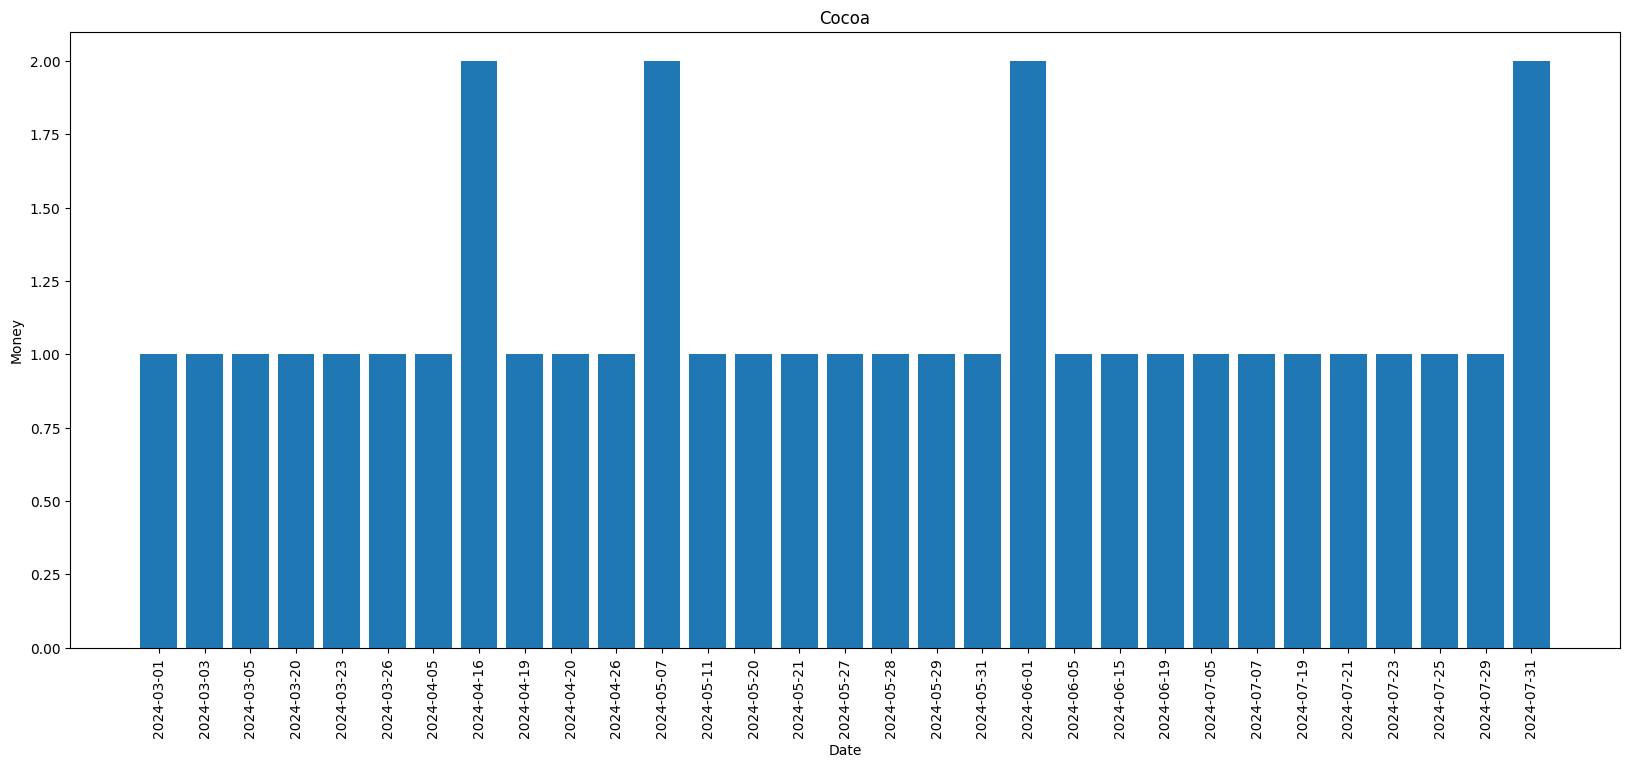

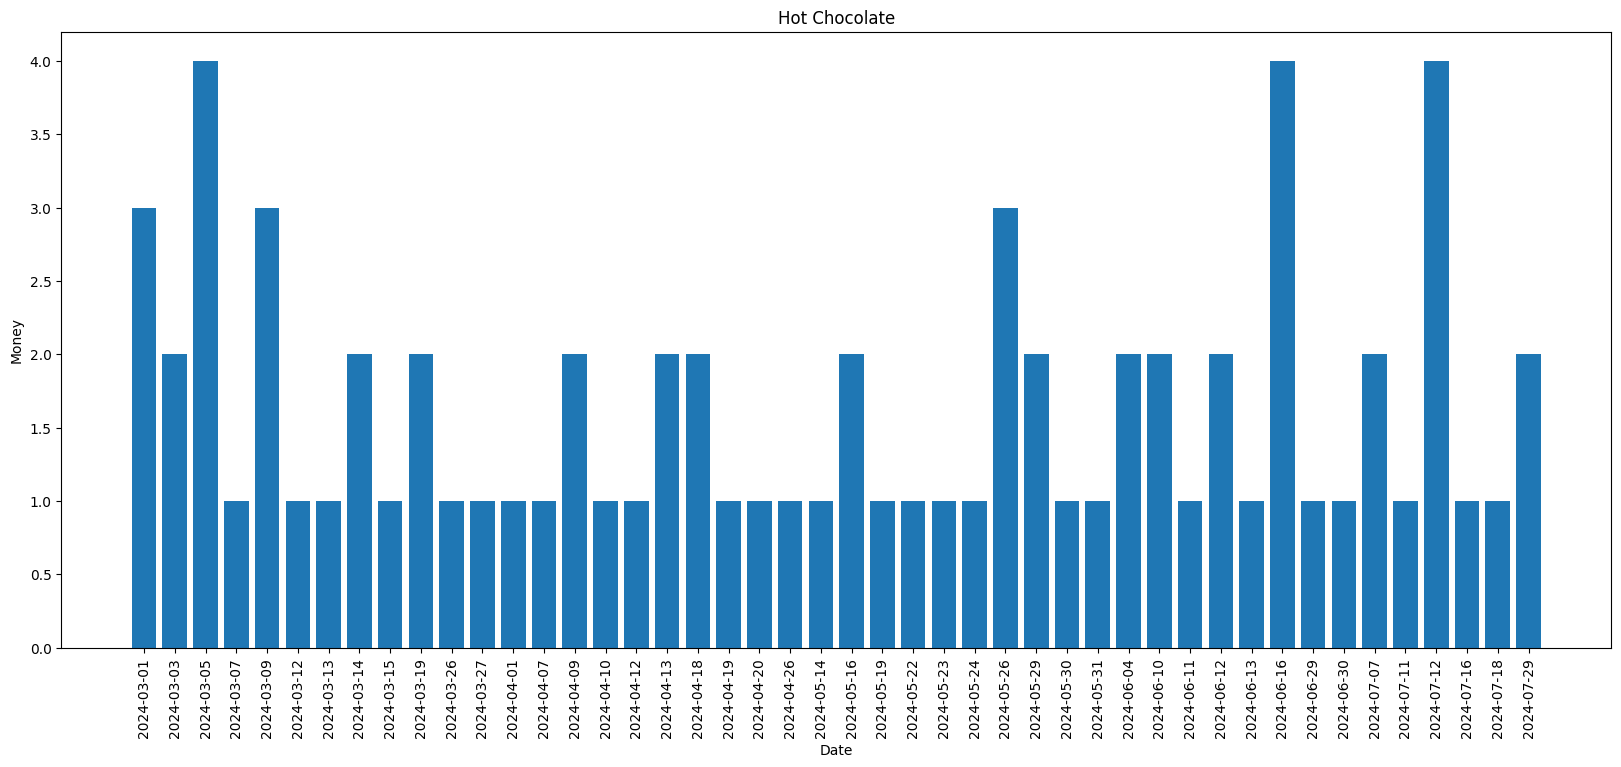

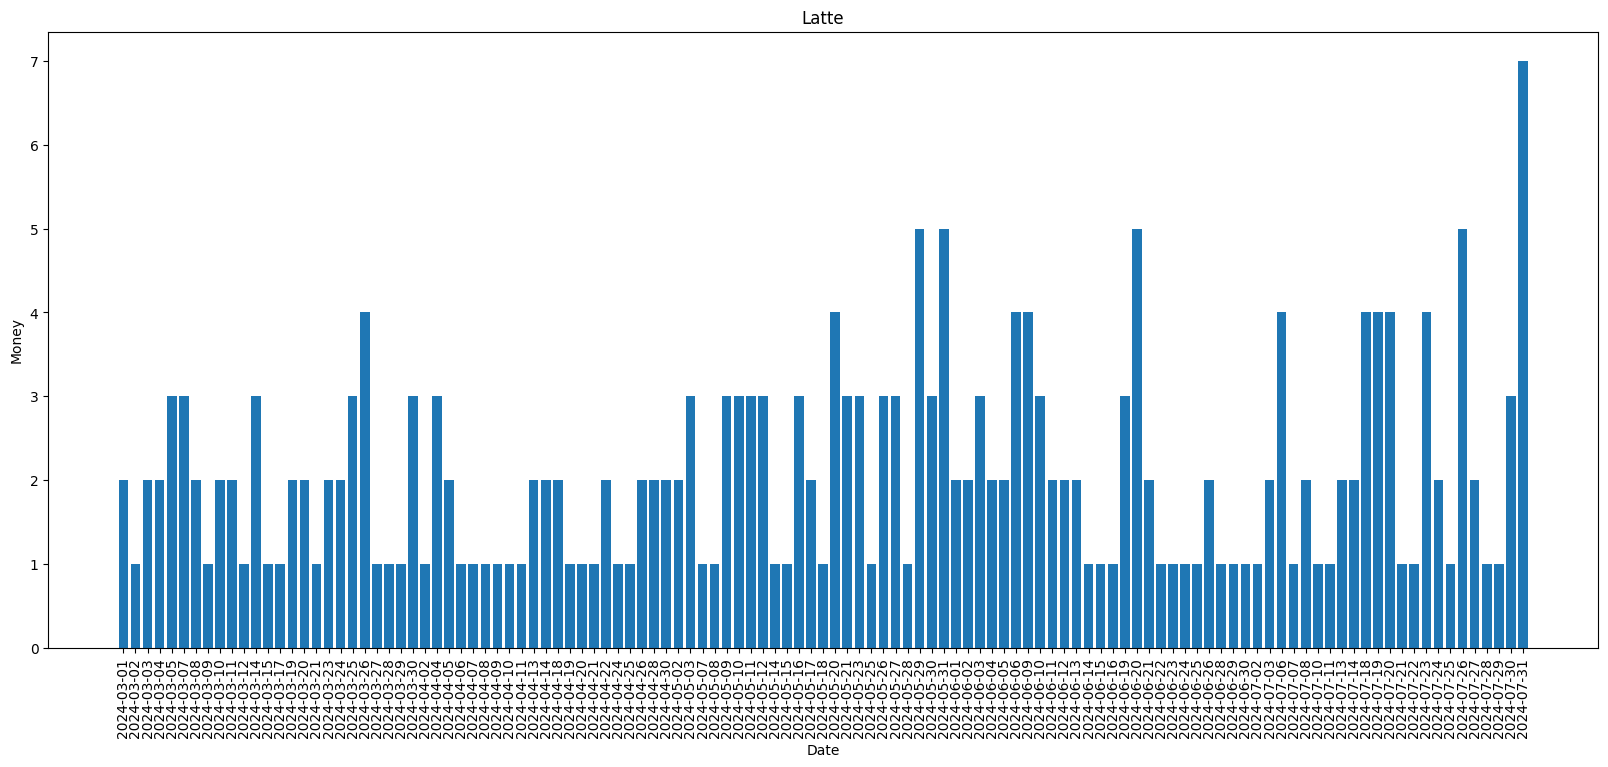

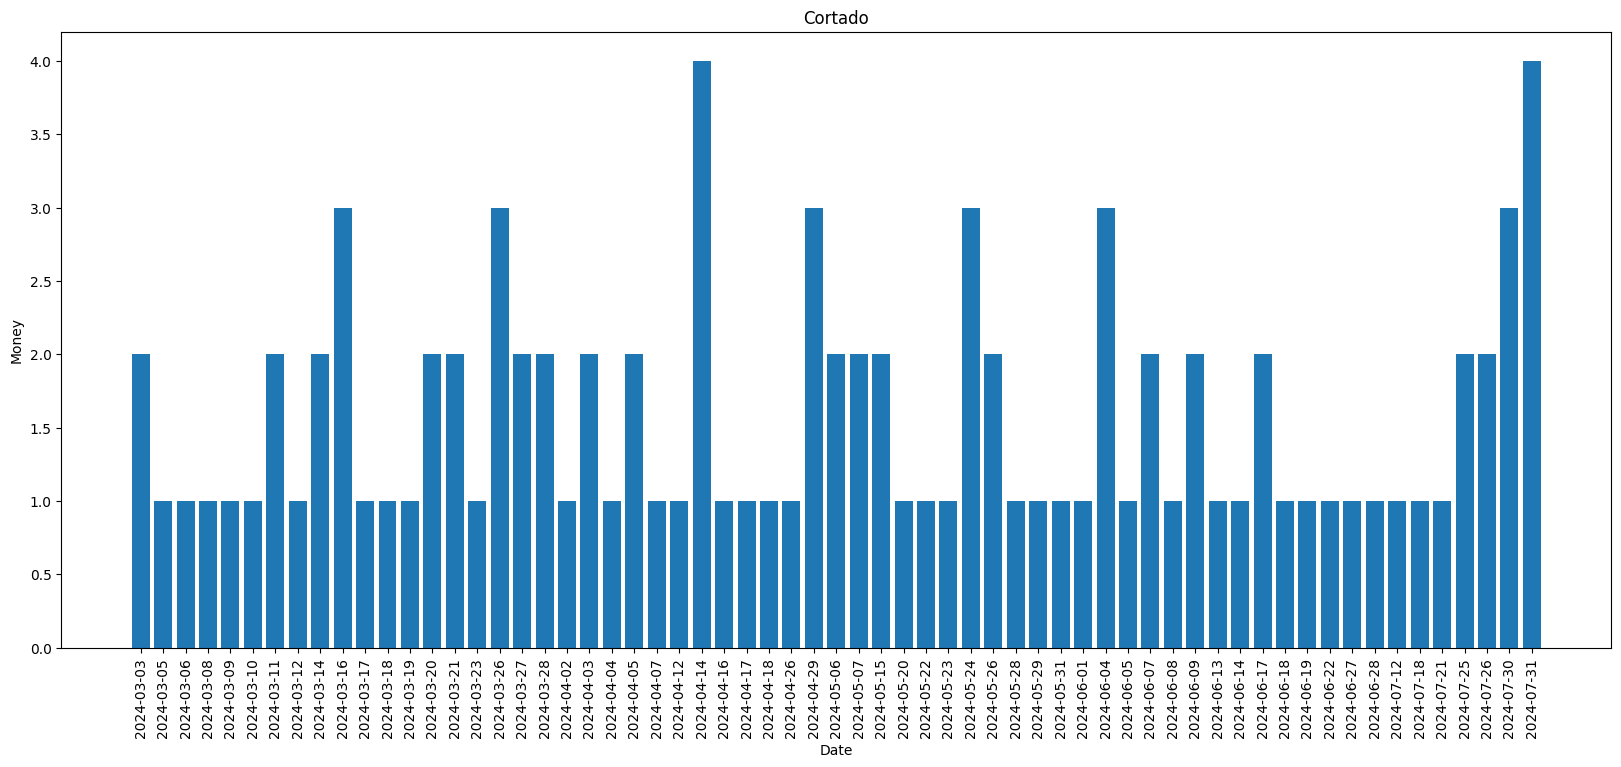

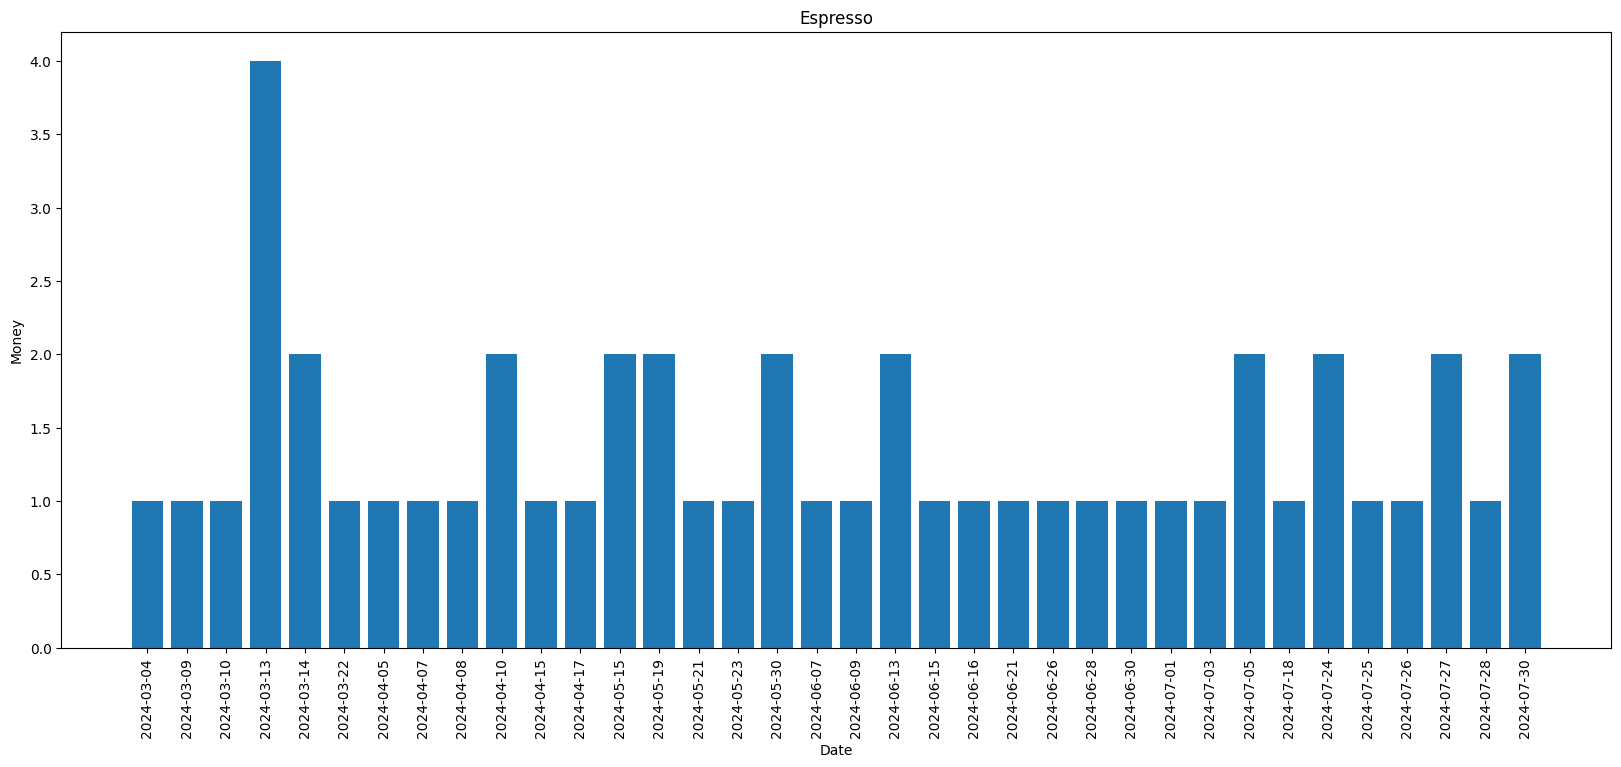

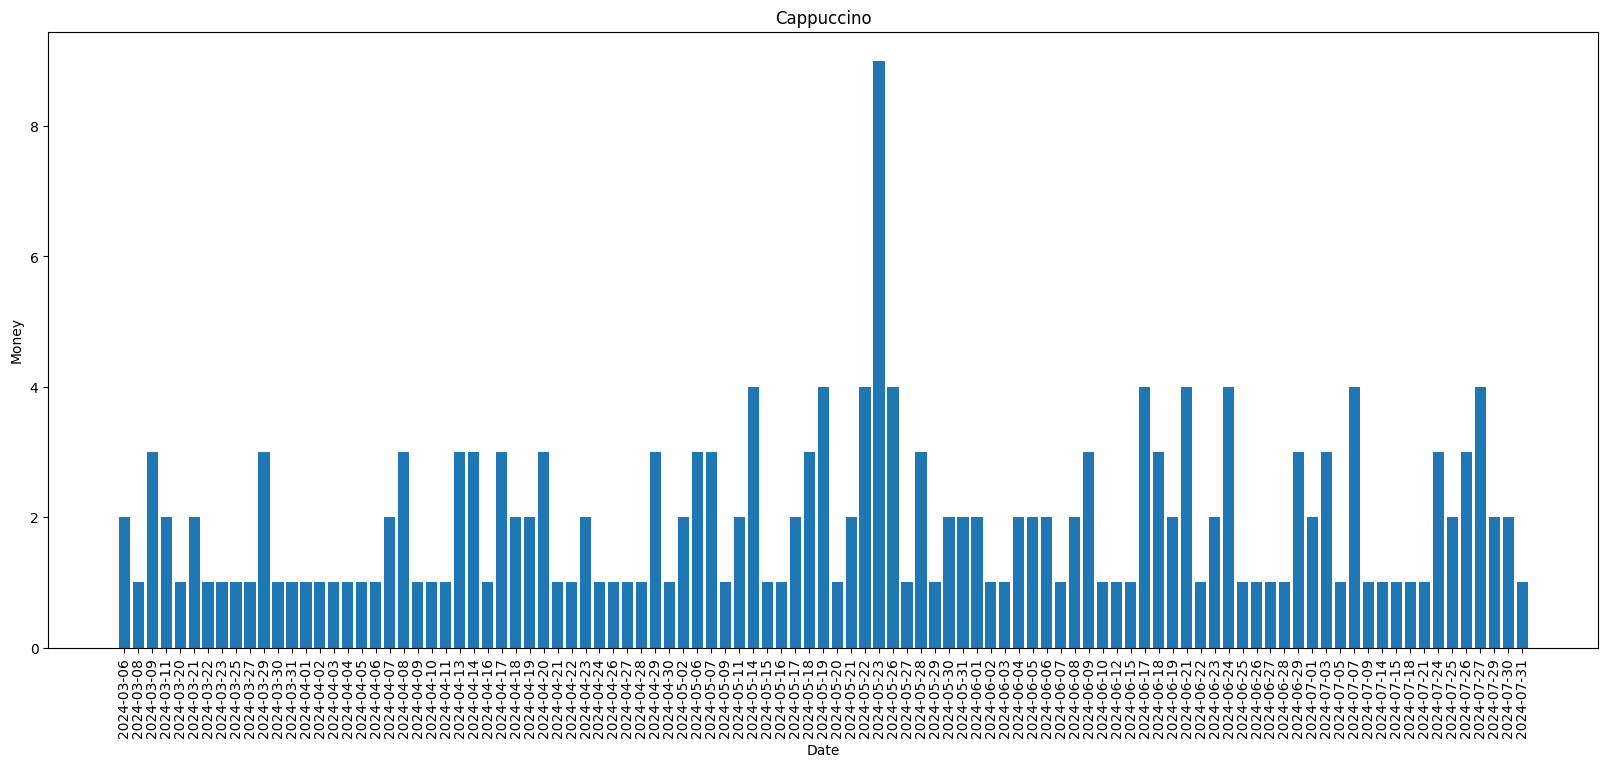

In [90]:
data=df.copy()
data=data.groupby(['date','coffee_name'])['money'].count().reset_index()
data.head(5)

for i in data['coffee_name'].unique():
    plt.figure(figsize=(20,8))
    subset=data[data['coffee_name']==i]
    plt.bar(subset['date'],subset['money'],label=i)
    plt.title(i)
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel('Money')
    plt.show()

In [91]:
data.describe()

,money
count,600.000000
mean,1.888333
std,1.213116
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,12.000000


# Monthly Sales

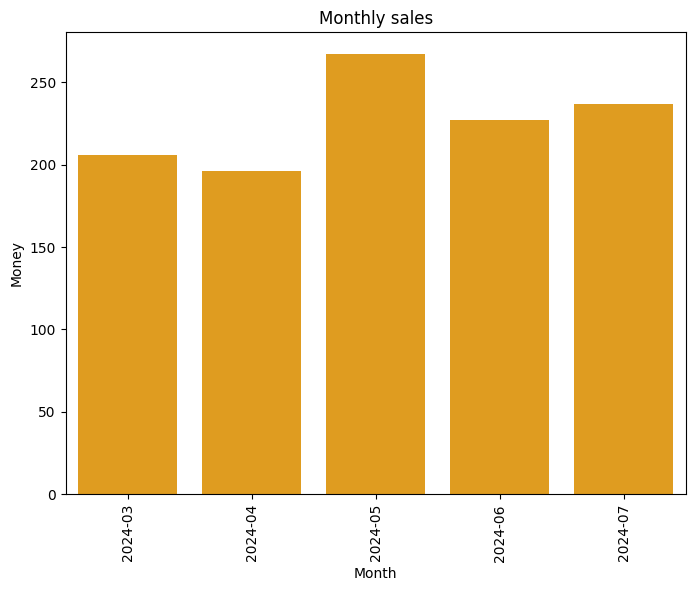

In [92]:
import seaborn as sns
data=df.copy()
data['month']=pd.to_datetime(data['date']).dt.to_period('M')
avgm=data.groupby('month')['money'].count().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='month',y='money',data=avgm,color='orange')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Money')
plt.title('Monthly sales')
plt.show()


            coffee_name    month  money
0             Americano  2024-03     36
1             Americano  2024-04     35
2             Americano  2024-05     48
3             Americano  2024-06     14
4             Americano  2024-07     36
5   Americano with Milk  2024-03     34
6   Americano with Milk  2024-04     42
7   Americano with Milk  2024-05     58
8   Americano with Milk  2024-06     69
9   Americano with Milk  2024-07     65
10           Cappuccino  2024-03     20
11           Cappuccino  2024-04     43
12           Cappuccino  2024-05     55
13           Cappuccino  2024-06     46
14           Cappuccino  2024-07     32
15                Cocoa  2024-03      6
16                Cocoa  2024-04      6
17                Cocoa  2024-05      9
18                Cocoa  2024-06      5
19                Cocoa  2024-07      9
20              Cortado  2024-03     30
21              Cortado  2024-04     19
22              Cortado  2024-05     17
23              Cortado  2024-06     19


C:\Users\HMC\AppData\Local\Temp\ipykernel_17800\2454832347.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['month']=d['month'].astype('str')


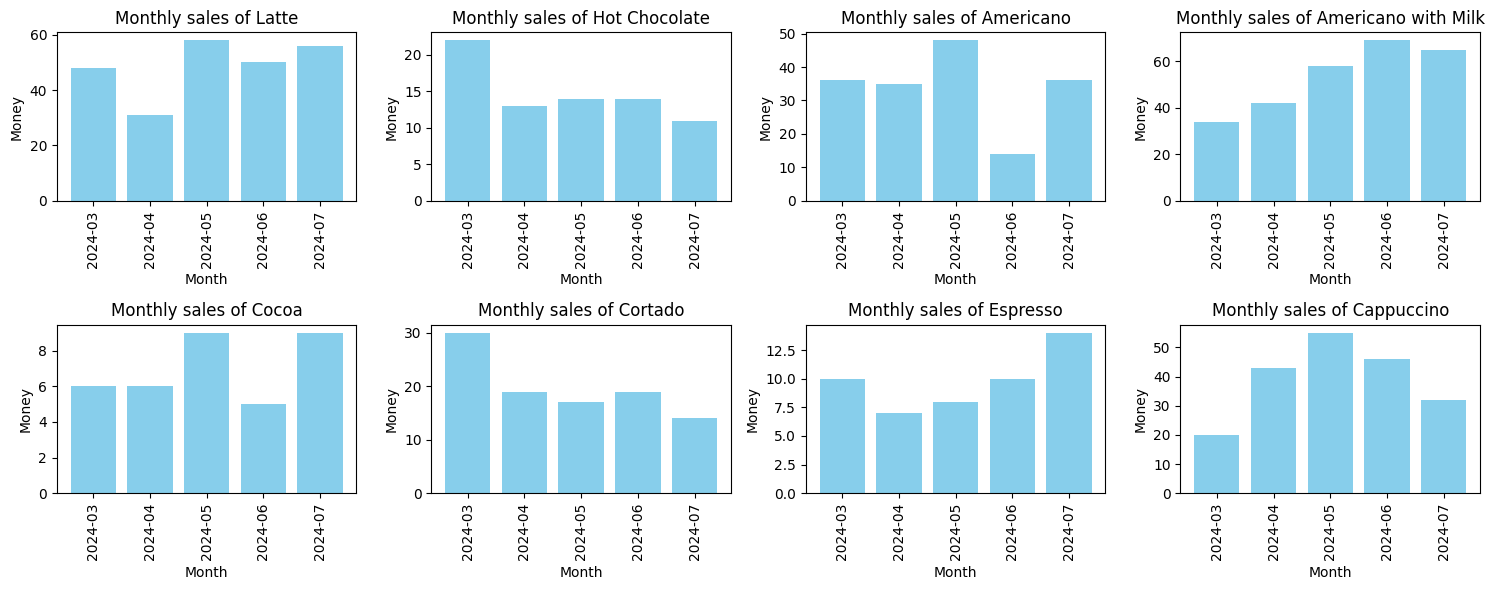

In [93]:
import math
data=df.copy()
data['month']=pd.to_datetime(data['date']).dt.to_period('M')
avgm=data.groupby(['coffee_name','month'])['money'].count().reset_index()
print(avgm)

coffee_type=data['coffee_name'].unique()
ncols=4
nrows=math.ceil(len(coffee_type)/ncols)

fig,axes=plt.subplots(nrows,ncols,figsize=(15,3*nrows),sharex=False,sharey=False)
axes=axes.flatten()

for i,coffee in enumerate(coffee_type):
    ax=axes[i]
    d=avgm[avgm['coffee_name']==coffee]
    d['month']=d['month'].astype('str')
    ax.bar(d['month'],d['money'],color='skyblue')
    ax.set_xlabel('Month')
    ax.tick_params(axis='x',rotation=90)
    ax.set_ylabel('Money')
    ax.set_title(f"Monthly sales of {coffee}")
plt.tight_layout()
plt.show()


In [94]:
monthly_sales=pd.pivot_table(avgm,values='money',index='month',columns='coffee_name',aggfunc='sum')
print(monthly_sales)

coffee_name  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
month                                                                     
2024-03             36                   34          20      6       30   
2024-04             35                   42          43      6       19   
2024-05             48                   58          55      9       17   
2024-06             14                   69          46      5       19   
2024-07             36                   65          32      9       14   

coffee_name  Espresso  Hot Chocolate  Latte  
month                                        
2024-03            10             22     48  
2024-04             7             13     31  
2024-05             8             14     58  
2024-06            10             14     50  
2024-07            14             11     56  


In [95]:
monthly_sales.describe()

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,33.800000,53.600000,39.200000,7.000000,19.800000,9.800000,14.800000,48.600000
std,12.296341,15.043271,13.516656,1.870829,6.058052,2.683282,4.207137,10.667708
min,14.000000,34.000000,20.000000,5.000000,14.000000,7.000000,11.000000,31.000000
25%,35.000000,42.000000,32.000000,6.000000,17.000000,8.000000,13.000000,48.000000
50%,36.000000,58.000000,43.000000,6.000000,19.000000,10.000000,14.000000,50.000000
75%,36.000000,65.000000,46.000000,9.000000,19.000000,10.000000,14.000000,56.000000
max,48.000000,69.000000,55.000000,9.000000,30.000000,14.000000,22.000000,58.000000


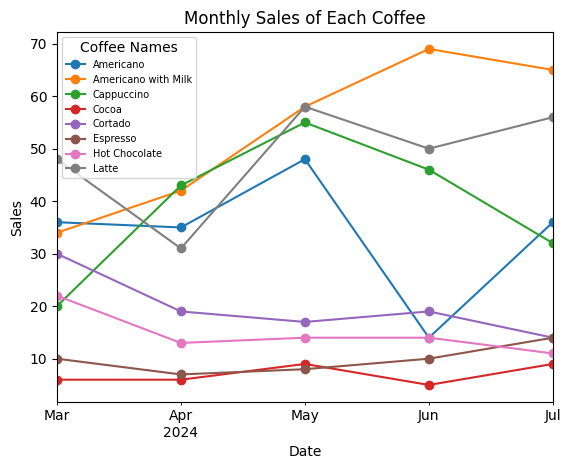

In [96]:

monthly_sales.plot(kind='line',marker='o')
plt.title('Monthly Sales of Each Coffee')
plt.legend(title='Coffee Names',fontsize=7,loc='upper left')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.show()

# Weekly Sales

In [97]:
data=df.copy()
data['date']=pd.to_datetime(data['date'])
data['weekday']=data['date'].dt.day_name()
total_weekly_sales=data.groupby('weekday')['money'].count().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
print(total_weekly_sales)

weekday
Monday       151
Tuesday      185
Wednesday    165
Thursday     164
Friday       163
Saturday     154
Sunday       151
Name: money, dtype: int64


In [98]:
plt.plot(total_weekly_sales)

In [99]:
data=df.copy()
data['date']=pd.to_datetime(data['date'])
data['weekday']=data['date'].dt.day_name()

weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data['weekday']=pd.Categorical(data['weekday'],categories=weekday_order,ordered=True)

weekly_sales=data.groupby(['weekday','coffee_name'])['money'].count().reset_index()
print(weekly_sales)

      weekday          coffee_name  money
0      Monday            Americano     37
1      Monday  Americano with Milk     32
2      Monday           Cappuccino     31
3      Monday                Cocoa      3
4      Monday              Cortado     11
5      Monday             Espresso      4
6      Monday        Hot Chocolate      5
7      Monday                Latte     28
8     Tuesday            Americano     26
9     Tuesday  Americano with Milk     54
10    Tuesday           Cappuccino     27
11    Tuesday                Cocoa      9
12    Tuesday              Cortado     18
13    Tuesday             Espresso      3
14    Tuesday        Hot Chocolate     15
15    Tuesday                Latte     33
16  Wednesday            Americano     23
17  Wednesday  Americano with Milk     35
18  Wednesday           Cappuccino     29
19  Wednesday                Cocoa      6
20  Wednesday              Cortado     18
21  Wednesday             Espresso     13
22  Wednesday        Hot Chocolate

coffee_name  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
weekday                                                                   
Monday              37                   32          31      3       11   
Tuesday             26                   54          27      9       18   
Wednesday           23                   35          29      6       18   
Thursday            24                   31          27      1       14   
Friday              25                   34          23      7       16   
Saturday            17                   48          31      6        8   
Sunday              17                   34          28      3       14   

coffee_name  Espresso  Hot Chocolate  Latte  
weekday                                      
Monday              4              5     28  
Tuesday             3             15     33  
Wednesday          13              8     33  
Thursday            9             12     46  
Friday              8             13     37  
Sa

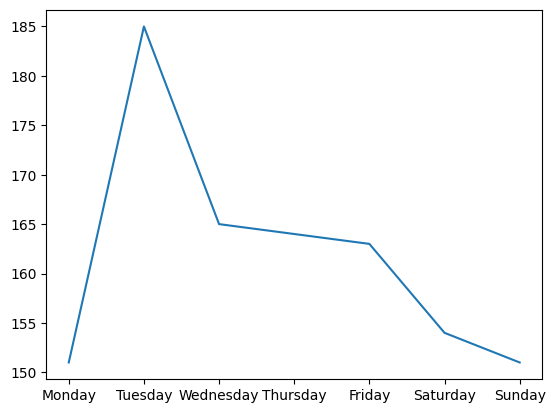

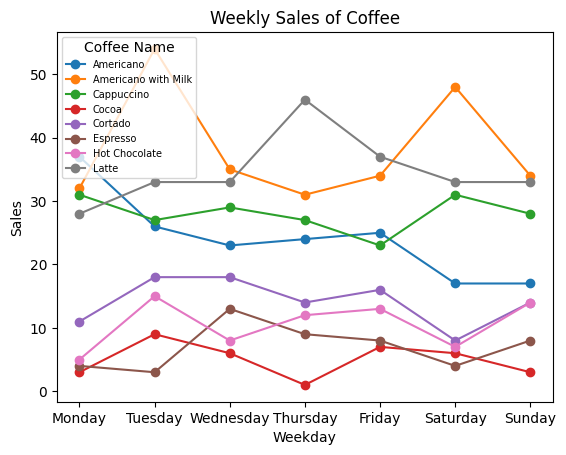

In [100]:
weekly_sales_p=pd.pivot_table(weekly_sales,index='weekday',columns='coffee_name',values='money',aggfunc='sum')
print(weekly_sales_p)

weekly_sales_p.plot(kind='line',marker='o')
plt.title('Weekly Sales of Coffee')
plt.xlabel('Weekday')
plt.ylabel('Sales')
plt.legend(title='Coffee Name',loc='upper left',fontsize=7)
plt.show()

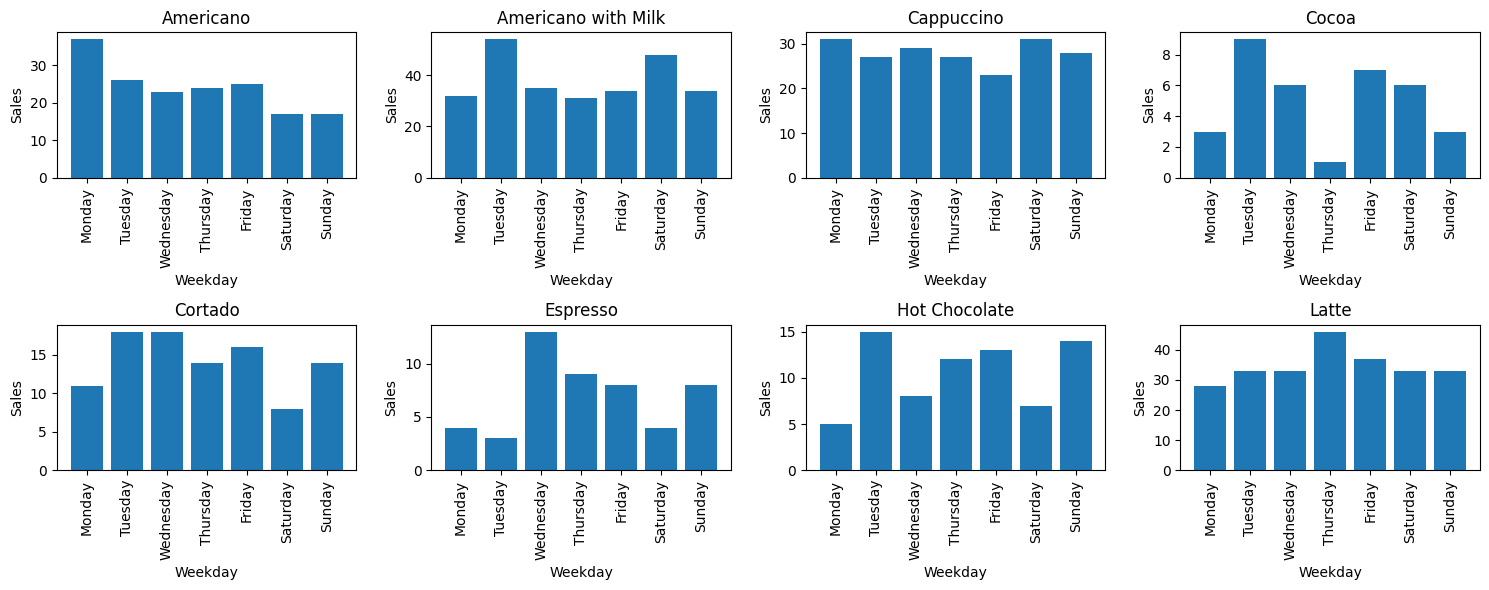

In [101]:
coffee_type=weekly_sales['coffee_name'].unique()

ncols=4
nrows=math.ceil(len(coffee_type)/ncols)

fig,axes=plt.subplots(nrows,ncols,figsize=(15,3*nrows))
axes=axes.flatten()

for i,coffee in enumerate(coffee_type):
    ax=axes[i]
    d=weekly_sales[weekly_sales['coffee_name']==coffee]
    ax.bar(d['weekday'],d['money'])
    ax.set_title(coffee)
    ax.set_xlabel('Weekday')
    ax.tick_params(axis='x',rotation=90)
    ax.set_ylabel('Sales')

plt.tight_layout()
plt.show()
    

# Hourly Sales

In [102]:
data=df.copy()
data['datetime']=pd.to_datetime(data['datetime'])
data['hour']=data['datetime'].dt.hour
total_hourly_sales=data.groupby('hour')['money'].count().reset_index()
print(total_hourly_sales)

    hour  money
0      7     13
1      8     44
2      9     50
3     10    133
4     11    103
5     12     87
6     13     78
7     14     76
8     15     65
9     16     77
10    17     77
11    18     75
12    19     96
13    20     54
14    21     70
15    22     35


In [103]:
total_hourly_sales.describe()

,hour,money
count,16.000000,16.000000
mean,14.500000,70.812500
std,4.760952,28.362461
min,7.000000,13.000000
25%,10.750000,53.000000
50%,14.500000,75.500000
75%,18.250000,80.250000
max,22.000000,133.000000


In [104]:
plt.bar(total_hourly_sales['hour'],total_hourly_sales['money'])

<BarContainer object of 16 artists>

In [105]:
data=df.copy()
data['datetime']=pd.to_datetime(data['datetime'])
data['hour']=data['datetime'].dt.hour
hourly_sales=data.groupby(['hour','coffee_name'])['money'].count().reset_index()
print(hourly_sales)

     hour          coffee_name  money
0       7            Americano      5
1       7  Americano with Milk      4
2       7           Cappuccino      1
3       7              Cortado      1
4       7                Latte      2
..    ...                  ...    ...
116    22                Cocoa      1
117    22              Cortado      2
118    22             Espresso      1
119    22        Hot Chocolate      5
120    22                Latte      6

[121 rows x 3 columns]


In [106]:
hourly_sales_p=pd.pivot_table(hourly_sales,index='hour',columns='coffee_name',values='money',aggfunc='sum')
print(hourly_sales_p)


coffee_name  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
hour                                                                      
7                  5.0                  4.0         1.0    NaN      1.0   
8                 10.0                  7.0         8.0    1.0      6.0   
9                  8.0                 16.0         6.0    1.0      5.0   
10                20.0                 31.0        10.0    4.0      8.0   
11                21.0                 25.0        16.0    1.0     13.0   
12                14.0                 26.0        15.0    3.0      7.0   
13                18.0                 18.0        10.0    2.0     12.0   
14                15.0                 18.0        13.0    4.0      6.0   
15                14.0                 15.0         8.0    NaN      3.0   
16                10.0                 18.0        12.0    3.0     12.0   
17                 9.0                 11.0        18.0    4.0      6.0   
18                 9.0   

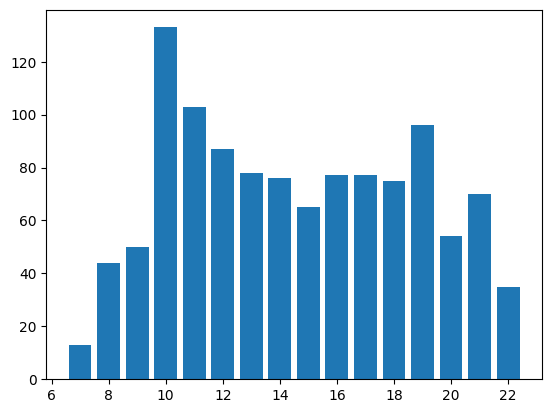

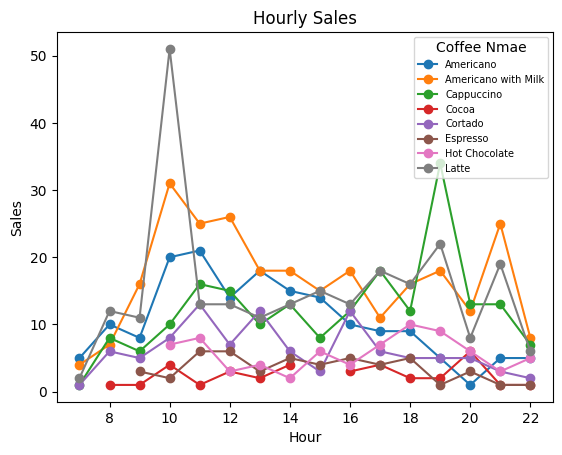

In [107]:
hourly_sales_p.plot(kind='line',marker='o')
plt.title('Hourly Sales')
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.legend(title='Coffee Nmae', loc='upper right',fontsize=7)
plt.show()

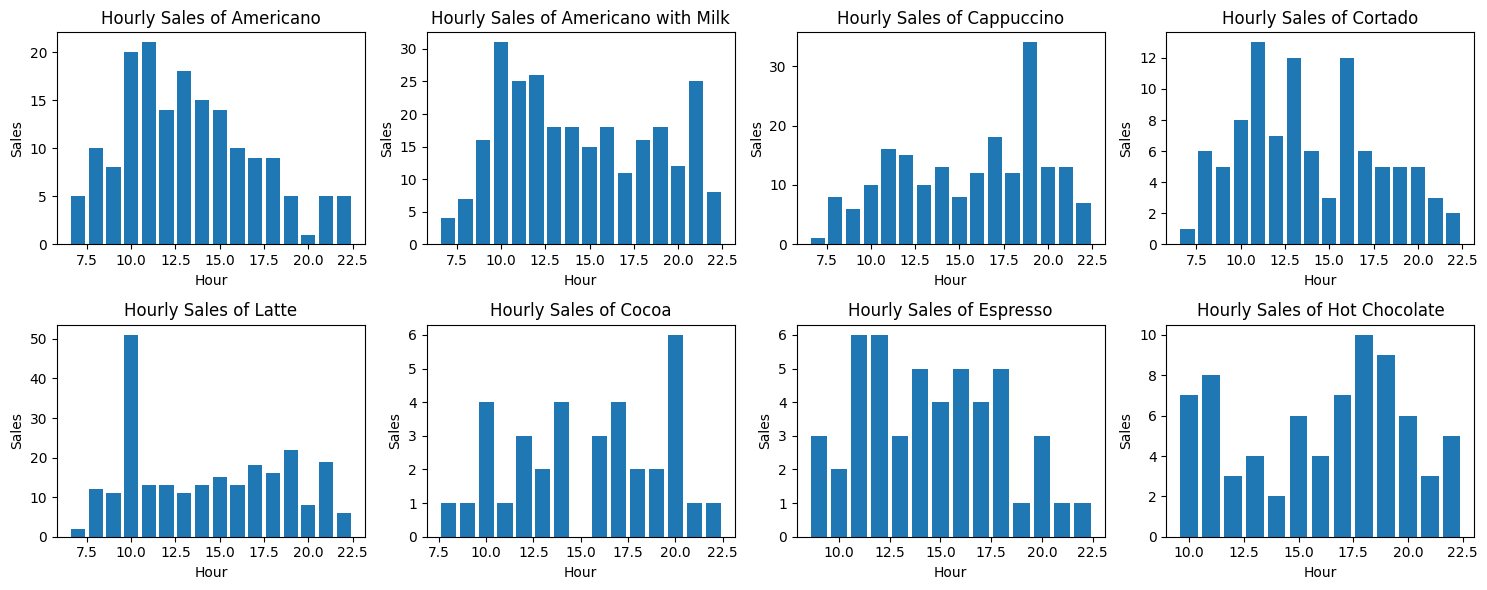

In [108]:
import math
coffee_type=hourly_sales['coffee_name'].unique()

n_cols=4
nrows=math.ceil(len(coffee_type)/n_cols)

fig,axes=plt.subplots(nrows,n_cols,figsize=(15,3*nrows),sharex=False,sharey=False)
axes=axes.flatten()

for i,coffee in enumerate(coffee_type):
    ax=axes[i]
    d=hourly_sales[hourly_sales['coffee_name']==coffee]
    ax.bar(d['hour'],d['money'])
    ax.set_title(f"Hourly Sales of {coffee}")
    ax.set_xlabel('Hour')
    ax.set_ylabel('Sales')

plt.tight_layout()
plt.show()

#   To find the no of customers who have vistied more than 10 

In [109]:
data=df.copy()
data=data.groupby('card')['money'].count().reset_index()
print(data)

                    card  money
0    ANON-0000-0000-0001     17
1    ANON-0000-0000-0002      2
2    ANON-0000-0000-0003     23
3    ANON-0000-0000-0004      9
4    ANON-0000-0000-0005      1
..                   ...    ...
441  ANON-0000-0000-0442      1
442  ANON-0000-0000-0443      3
443  ANON-0000-0000-0444      1
444  ANON-0000-0000-0445      1
445  ANON-0000-0000-0446      1

[446 rows x 2 columns]


In [110]:
customers=data[data['money']>10]
print(customers)
    

                    card  money
0    ANON-0000-0000-0001     17
2    ANON-0000-0000-0003     23
8    ANON-0000-0000-0009     63
11   ANON-0000-0000-0012     88
23   ANON-0000-0000-0024     12
39   ANON-0000-0000-0040     22
58   ANON-0000-0000-0059     12
96   ANON-0000-0000-0097     27
133  ANON-0000-0000-0134     11
140  ANON-0000-0000-0141     17
179  ANON-0000-0000-0180     12
